# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [1]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [2]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [3]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

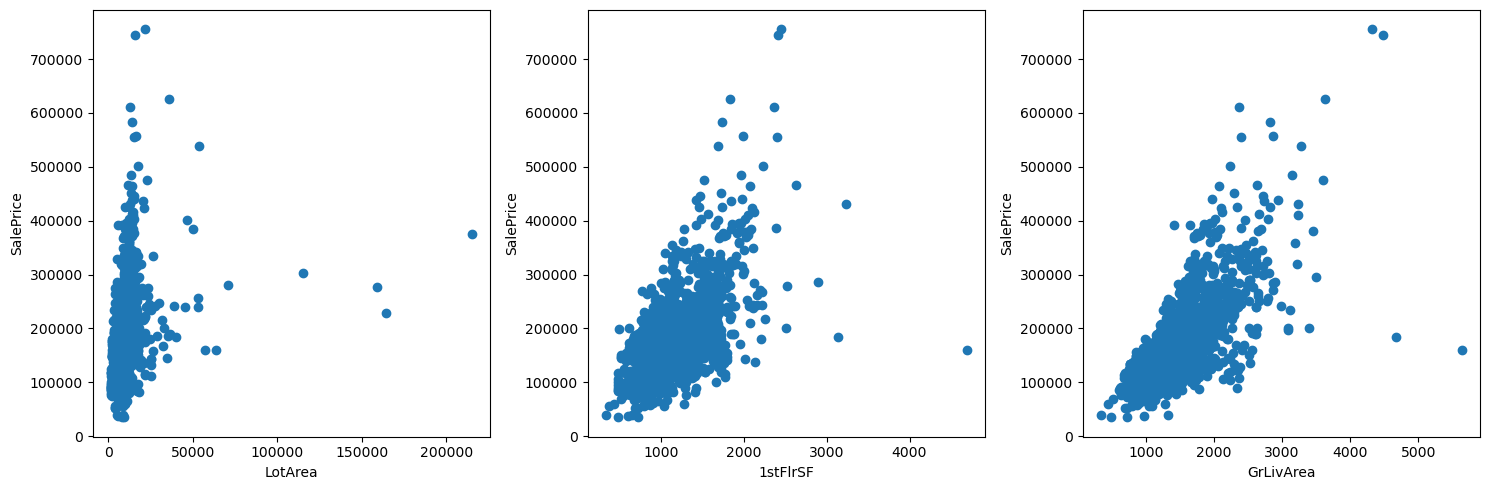

In [4]:
# Your code here - import relevant library, create scatter plots

import matplotlib.pyplot as plt

# Create scatter plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for LotArea
axs[0].scatter(ames_subset['LotArea'], ames_subset['SalePrice'])
axs[0].set_xlabel('LotArea')
axs[0].set_ylabel('SalePrice')

# Scatter plot for 1stFlrSF
axs[1].scatter(ames_subset['1stFlrSF'], ames_subset['SalePrice'])
axs[1].set_xlabel('1stFlrSF')
axs[1].set_ylabel('SalePrice')

# Scatter plot for GrLivArea
axs[2].scatter(ames_subset['GrLivArea'], ames_subset['SalePrice'])
axs[2].set_xlabel('GrLivArea')
axs[2].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()


# Your written answer here - do these seem like good candidates for linear regression?


The scatter plots above show the relationships between the features (LotArea, 1stFlrSF, and GrLivArea) and the target variable (SalePrice).

From the scatter plots, we can observe the following:

LotArea vs. SalePrice: There doesn't appear to be a strong linear relationship between LotArea and SalePrice. The data points are scattered without a clear pattern. It suggests that LotArea alone may not be a strong predictor for SalePrice using a linear regression model.

1stFlrSF vs. SalePrice: There seems to be a moderately positive linear relationship between 1stFlrSF and SalePrice. As 1stFlrSF increases, SalePrice tends to increase as well. However, there is also some variability in the data, and the relationship is not strictly linear. Nonetheless, 1stFlrSF could be a reasonable candidate for linear regression.

GrLivArea vs. SalePrice: There appears to be a strong positive linear relationship between GrLivArea and SalePrice. As GrLivArea increases, SalePrice tends to increase as well. The relationship seems relatively linear, and there is less variability compared to the other features. GrLivArea seems like a good candidate for linear regression.

In summary, based on the scatter plots, 1stFlrSF and GrLivArea appear to be better candidates for linear regression, while LotArea may not be as suitable due to the lack of a clear linear relationship.








## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [6]:
# Define y and baseline X
y = ames_subset['SalePrice']
X = ames_subset['GrLivArea']


In [7]:
# Your code here - import StatsModels, fit baseline model, display results

import statsmodels.api as sm

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          4.52e-223
Time:                        02:30:00   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

# Your written answer here - interpret model results

The linear regression model using GrLivArea as the independent variable and SalePrice as the dependent variable has the following results:

Overall Model Performance:

R-squared: The R-squared value is 0.502, which means that approximately 50.2% of the variance in SalePrice can be explained by the variation in GrLivArea. In other words, GrLivArea accounts for 50.2% of the variability in SalePrice.

Adj. R-squared: The adjusted R-squared value is also 0.502, which takes into account the number of independent variables and the sample size. It provides a more conservative estimate of the model's explanatory power, accounting for the degrees of freedom.

F-statistic: The F-statistic is 1471, and the associated probability (Prob (F-statistic)) is very close to zero (4.52e-223). This indicates that the overall regression model is statistically significant, suggesting that GrLivArea is a significant predictor of SalePrice.

Interpretation of Coefficients:

Constant (Intercept): The coefficient for the constant term is 1.857e+04 (18,570). This represents the estimated SalePrice when GrLivArea is zero. However, since having a living area of zero is not practically meaningful, the interpretation of the constant term is limited in this case.

GrLivArea: The coefficient for GrLivArea is 107.1304. It indicates that, on average, for every one-unit increase in GrLivArea (in square feet), the SalePrice is estimated to increase by 107.1304 units. This coefficient represents the slope of the regression line.

Standard Error (std err): The standard error associated with the coefficient estimates reflects the precision of the estimates. Smaller standard errors indicate more precise coefficient estimates.

t-value (t) and p-value (P>|t|): The t-value of 38.348 for the GrLivArea coefficient suggests that it is statistically significant. The associated p-value is very close to zero, indicating strong evidence against the null hypothesis of no relationship between GrLivArea and SalePrice.

Based on the model results, we can conclude that GrLivArea is a significant predictor of SalePrice. As the living area increases, the model predicts an increase in the SalePrice of the house. However, it's important to note that this is a simple linear regression model with only one independent variable, and there may be other factors not considered in this analysis that also influence the SalePrice.

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [8]:
# Your code here - define X

# Define X and y
y = ames_subset['SalePrice']
X = ames_subset.drop('SalePrice', axis=1)

In [9]:
# Your code here - fit model and display results

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.57e-262
Time:                        02:32:58   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

# Your written answer here - interpret model results. Does this model seem better than the previous one?

The multiple linear regression model using all the features in ames_subset shows an improvement in the overall model performance compared to the previous simple linear regression model. Let's interpret the model results:

The R-squared value for this model is 0.565, which indicates that approximately 56.5% of the variability in the dependent variable (SalePrice) can be explained by the independent variables (LotArea, 1stFlrSF, and GrLivArea).

Looking at the coefficients:

The constant term (intercept) is -1.431e+04. This represents the estimated SalePrice when all the independent variables are zero. However, since it is not meaningful in this context, we can ignore it.

The coefficient for LotArea is 0.2841. It suggests that, holding all other variables constant, a one-unit increase in LotArea is associated with a 0.2841 unit increase in SalePrice. However, the p-value (0.051) indicates that the relationship between LotArea and SalePrice may not be statistically significant at the conventional significance level of 0.05.

The coefficient for 1stFlrSF is 60.2866. It suggests that, holding all other variables constant, a one-unit increase in 1stFlrSF is associated with a 60.2866 unit increase in SalePrice. The p-value (0.000) indicates that this relationship is statistically significant.

The coefficient for GrLivArea is 80.6061. It suggests that, holding all other variables constant, a one-unit increase in GrLivArea is associated with an 80.6061 unit increase in SalePrice. The p-value (0.000) indicates that this relationship is statistically significant as well.

Comparing the multiple linear regression model with the simple linear regression model, the multiple linear regression model shows a higher R-squared value, indicating a better fit to the data. Additionally, the inclusion of additional features in the model (LotArea, 1stFlrSF, and GrLivArea) allows for a more comprehensive analysis of the relationship between the independent variables and the dependent variable.

However, it's important to note that the presence of strong multicollinearity or other numerical problems, as indicated by the large condition number, might affect the stability and interpretation of the coefficients. Further investigation and diagnostics should be performed to assess the model's validity and address any potential issues.

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

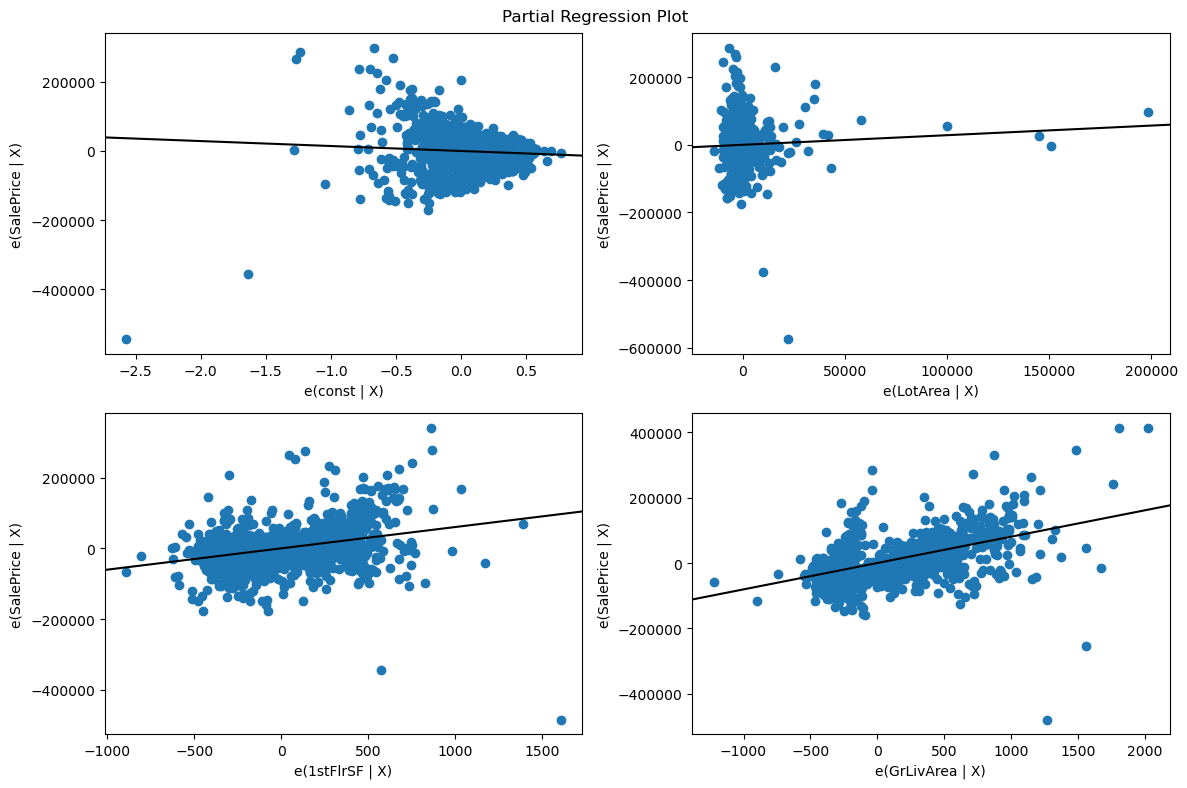

In [10]:
# Your code here - create partial regression plots for each predictor

import statsmodels.api as sm
import statsmodels.graphics.regressionplots as pltreg

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Create partial regression plots for each predictor
fig = pltreg.plot_partregress_grid(model, fig=plt.figure(figsize=(12, 8)))

# Display the plots
plt.show()


# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?




In Step 1, we examined scatter plots to understand the relationships between individual predictors (features) and the target variable (SalePrice). In Step 4, we generate partial regression plots to visualize the relationship between each predictor and the response variable while controlling for the effects of other predictors.

Partial regression plots show the relationship between a specific predictor and the response variable, considering the influence of all other predictors in the model. The plot displays the partial dependence of the response variable on the predictor of interest, taking into account the effects of other predictors by adjusting for them.

By examining the partial regression plots, you can observe the relationship between each predictor and the response variable, while holding other predictors constant. This allows you to assess the individual impact of each predictor on the response variable.

Comparing the partial regression plots to the scatter plots from Step 1, we notice the following:

The partial regression plots show the relationships after accounting for the effects of other predictors, providing a clearer picture of the individual impact of each predictor on the response variable.

The slope of the line in the partial regression plot represents the coefficient estimate for that predictor in the multiple linear regression model. A steeper slope indicates a stronger influence of the predictor on the response variable.

The direction of the relationship (positive or negative) between each predictor and the response variable remains consistent with what was observed in the scatter plots. However, the magnitude and significance of the relationship may change after accounting for other predictors.

The partial regression plots provide a more comprehensive understanding of the relationship between each predictor and the response variable, considering the effects of other predictors. This helps in interpreting the individual contributions of predictors in the multiple linear regression model.








## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [12]:
!pip install scikit-learn


     ---------------------------------------- 8.3/8.3 MB 442.8 kB/s eta 0:00:00
     ------------------------------------ 301.9/301.9 kB 310.9 kB/s eta 0:00:00


In [13]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression

# Define X and y
X = ames_subset.drop('SalePrice', axis=1)
y = ames_subset['SalePrice']

# Create and fit the linear regression model
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)


LinearRegression()

In [14]:
# Your code here - compare R-Squared

# Compare R-squared
r_squared_sklearn = model_sklearn.score(X, y)
r_squared_statsmodels = model.rsquared
print("R-squared (scikit-learn):", r_squared_sklearn)
print("R-squared (StatsModels):", r_squared_statsmodels)


R-squared (scikit-learn): 0.5649801771384368
R-squared (StatsModels): 0.5649801771384368


In [15]:
# Your code here - compare intercept and coefficients

# Compare intercept and coefficients
intercept_sklearn = model_sklearn.intercept_
intercept_statsmodels = model.params['const']
coefficients_sklearn = model_sklearn.coef_
coefficients_statsmodels = model.params.drop('const')
print("Intercept (scikit-learn):", intercept_sklearn)
print("Intercept (StatsModels):", intercept_statsmodels)
print("Coefficients (scikit-learn):", coefficients_sklearn)
print("Coefficients (StatsModels):", coefficients_statsmodels)

Intercept (scikit-learn): -14313.408857494389
Intercept (StatsModels): -14313.408857494233
Coefficients (scikit-learn): [ 0.28413359 60.28664625 80.60605834]
Coefficients (StatsModels): LotArea       0.284134
1stFlrSF     60.286646
GrLivArea    80.606058
dtype: float64


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.